In [1]:
import pandas as pd

In [2]:
!pip install pandas

In [3]:
# Load the dataset from the CSV file
df = pd.read_csv(r"D:\UoS Applied Data Science\PROM02\Dataset\new\electric1.csv")

# Display the first and last five rows of the dataset to verify the data and the columns
df

,Gender,Age_Range,Education_Level,Location,Country,Heard_of_EC,Someone_Owns,Self_Own_EC,Satisfied_Experience,Displace_Normal_Cars,...,Consider_Government_Incentives,Consider_Model,Consider_Charging_Time,Reduction_Greenhouse_Positive,Reduction_Fossil_Positive,Lower_Cost_Positive,Range_Charging_Barrier,Upfront_Cost_Barrier,Gov_Offer_Incentives,Gov_Set_Emissions
0,Male,51-61,Master's Degree or Higher,Shanghai,China,Yes,Yes,Yes,Very Satisfied,Agree,...,Somewhat Agree,Neither Agree nor Disagree,Strongly Agree,Agree,Somewhat Agree,Agree,Strongly Agree,Somewhat Agree,Strongly Agree,Disagree
1,Male,29-39,Bachelor's Degree,"Guangzhou, china",China,Yes,Yes,No,Not Applicable,Strongly Agree,...,Strongly Agree,Agree,Agree,Agree,Agree,Agree,Agree,Disagree,Agree,Disagree
2,Male,29-39,Bachelor's Degree,China,China,Yes,Yes,No,Not Applicable,Somewhat Agree,...,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Disagree,Disagree,Agree
3,Male,29-39,Master's Degree or Higher,Shanghai,China,Yes,Yes,No,Not Applicable,Neither Agree nor Disagree,...,Agree,Strongly Agree,Somewhat Agree,Neither Agree nor Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Neither Agree nor Disagree,Strongly Agree,Neither Agree nor Disagree
4,Female,29-39,Bachelor's Degree,chIna,China,Yes,Yes,Yes,Satisfied,Strongly Agree,...,Strongly Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Male,18-28,Secondary School,Accra,Ghana,Yes,No,No,Not Applicable,Agree,...,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Somewhat Agree
226,Female,18-28,Secondary School,Kumasi,Ghana,Yes,No,No,Not Applicable,Somewhat Agree,...,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Somewhat Disagree,Strongly Agree,Strongly Agree,Agree,Agree
227,Male,29-39,College or Vocational Training,Accra,Ghana,Yes,No,No,Not Applicable,Strongly Agree,...,Neither Agree nor Disagree,Somewhat Disagree,Agree,Strongly Agree,Strongly Agree,Disagree,Agree,Agree,Strongly Agree,Strongly Agree
228,Female,18-28,Secondary School,Accra,Ghana,Yes,No,No,Not Applicable,Somewhat Agree,...,Agree,Somewhat Agree,Strongly Agree,Agree,Agree,Disagree,Strongly Agree,Strongly Agree,Agree,Agree


In [4]:
# Encoding scheme for "Consider" variables
consider_encoding_map = {
    "Strongly Agree": 6,
    "Agree": 5,
    "Somewhat Agree": 4,
    "Neither Agree nor Disagree": 3,  # Assuming neutral and any form of disagreement are less indicative of recommendation
    "Disagree": 2,
    "Somewhat Disagree": 1,
    "Strongly Disagree": 0
}


# Encode the "Consider" variables with the scheme
df["Consider_Environment_Encoded"] = df["Consider_Environment"].map(consider_encoding_map)
df["Consider_Range_Encoded"] = df["Consider_Range"].map(consider_encoding_map)
df["Consider_Charging_Infrastructure_Encoded"] = df["Consider_Charging Infrastructure"].map(consider_encoding_map)

In [5]:
df["Consider_Environment_Encoded"]

0      5
1      6
2      4
3      6
4      5
      ..
225    1
226    2
227    1
228    2
229    1
Name: Consider_Environment_Encoded, Length: 230, dtype: int64

In [6]:
# Encoding "Recommend_EC" 
recommend_ec_encoding_map = {
    "Very Likely": 6,
    "Likely": 5,
    "Somewhat Likely": 4,
    "Neither Likely nor Unlikely": 3,
    "Somewhat Unlikely": 2,
    "Unlikely": 1,
    "Very Unlikely": 0
}

df["Recommend_EC_Encoded"] = df["Recommend_EC"].map(recommend_ec_encoding_map)

In [7]:
df["Recommend_EC_Encoded"]

0      5
1      4
2      5
3      4
4      5
      ..
225    2
226    1
227    2
228    1
229    2
Name: Recommend_EC_Encoded, Length: 230, dtype: int64

In [8]:
from scipy.stats import chi2_contingency

In [9]:
# Function to perform Chi-Square Test, create contingency table and return the p-value
def chi_square_test(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return p

In [10]:
# Perform Chi-Square Test for each predictor variable against "Recommend_EC_Encoded"
p_values = {
    "Consider_Environment_vs_Recommend_EC": chi_square_test(df, "Consider_Environment_Encoded", "Recommend_EC_Encoded"),
    "Consider_Range_vs_Recommend_EC": chi_square_test(df, "Consider_Range_Encoded", "Recommend_EC_Encoded"),
    "Consider_Charging_Infrastructure_vs_Recommend_EC": chi_square_test(df, "Consider_Charging_Infrastructure_Encoded", "Recommend_EC_Encoded")
}

p_values

{'Consider_Environment_vs_Recommend_EC': 1.6963914737006053e-47,
 'Consider_Range_vs_Recommend_EC': 7.665395332806692e-29,
 'Consider_Charging_Infrastructure_vs_Recommend_EC': 2.2107563296987642e-40}

In [1]:
import matplotlib.pyplot as plt

In [2]:
# The p-values from the chi-square tests in a dictionary format
p_values = {
    'Consider_Environment_vs_Recommend_EC': 1.6963914737006053e-47,
    'Consider_Range_vs_Recommend_EC': 7.665395332806692e-29,
    'Consider_Charging_Infrastructure_vs_Recommend_EC': 2.2107563296987642e-40
}

In [3]:
# Extract the predictor names and the corresponding p-values
predictors = list(p_values.keys())
p_values_list = list(p_values.values())

In [5]:
import numpy as np

In [6]:
# Convert p-values to a -log10 scale to make them easier to visualize on the bar chart
p_values_log = [-np.log10(p) for p in p_values_list]

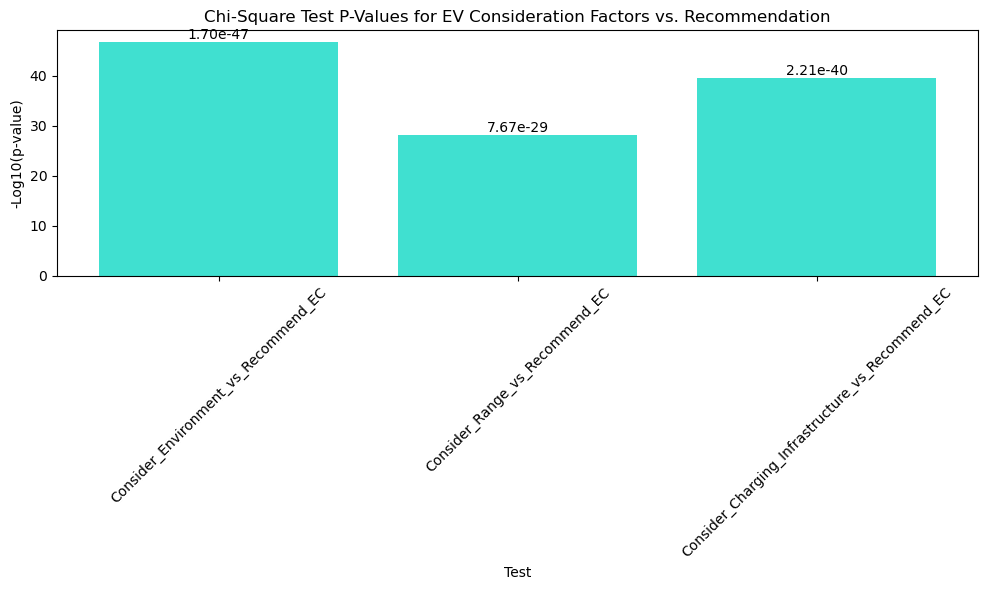

In [15]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(predictors, p_values_log, color='turquoise')

# Add labels and title
plt.xlabel('Test')
plt.ylabel('-Log10(p-value)')
plt.title('Chi-Square Test P-Values for EV Consideration Factors vs. Recommendation')
plt.xticks(rotation=45)

# Adding the actual p-values above the bars
for i, p_val in enumerate(p_values_log):
    plt.text(i, p_val, f'{p_values_list[i]:.2e}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()